In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set(font_scale=2)

In [5]:
terror=pd.read_csv("C:/Users/Mitra's/Downloads/globalterrorism.csv", encoding="ISO-8859-1", low_memory=False)
terror.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [6]:
terror.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [7]:
terror.summary

0                                                       NaN
1                                                       NaN
2                                                       NaN
3                                                       NaN
4                                                       NaN
                                ...                        
181686    12/31/2017: Assailants opened fire on a Somali...
181687    12/31/2017: Assailants launched mortars at the...
181688    12/31/2017: Assailants set fire to houses in K...
181689    12/31/2017: Assailants threw a grenade at a Fo...
181690    12/31/2017: An explosive device was discovered...
Name: summary, Length: 181691, dtype: object

In [8]:
for i in terror.columns:
    print(i, end=", ")

eventid, iyear, imonth, iday, approxdate, extended, resolution, country, country_txt, region, region_txt, provstate, city, latitude, longitude, specificity, vicinity, location, summary, crit1, crit2, crit3, doubtterr, alternative, alternative_txt, multiple, success, suicide, attacktype1, attacktype1_txt, attacktype2, attacktype2_txt, attacktype3, attacktype3_txt, targtype1, targtype1_txt, targsubtype1, targsubtype1_txt, corp1, target1, natlty1, natlty1_txt, targtype2, targtype2_txt, targsubtype2, targsubtype2_txt, corp2, target2, natlty2, natlty2_txt, targtype3, targtype3_txt, targsubtype3, targsubtype3_txt, corp3, target3, natlty3, natlty3_txt, gname, gsubname, gname2, gsubname2, gname3, gsubname3, motive, guncertain1, guncertain2, guncertain3, individual, nperps, nperpcap, claimed, claimmode, claimmode_txt, claim2, claimmode2, claimmode2_txt, claim3, claimmode3, claimmode3_txt, compclaim, weaptype1, weaptype1_txt, weapsubtype1, weapsubtype1_txt, weaptype2, weaptype2_txt, weapsubtype2

In [9]:
terror=terror[['iyear','imonth','iday','extended','country_txt','region_txt','city','success','suicide','attacktype1_txt',
         'targtype1_txt','gname','weaptype1_txt','nkill']]
terror.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','extended':'Extended','country_txt':'Country',
                   'region_txt':'Region','city':'City','success':'Success','suicide':'Suicide','attacktype1_txt':'Attack Type',
                   'targtype1_txt':'Target Type','gname':'Attack Group',
                   'weaptype1_txt':'Weapon','nkill':'Number of People Killed'},inplace=True)

In [10]:
terror.head()

,Year,Month,Day,Extended,Country,Region,City,Success,Suicide,Attack Type,Target Type,Attack Group,Weapon,Number of People Killed
0,1970,7,2,0,Dominican Republic,Central America & Caribbean,Santo Domingo,1,0,Assassination,Private Citizens & Property,MANO-D,Unknown,1.0
1,1970,0,0,0,Mexico,North America,Mexico city,1,0,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,Unknown,0.0
2,1970,1,0,0,Philippines,Southeast Asia,Unknown,1,0,Assassination,Journalists & Media,Unknown,Unknown,1.0
3,1970,1,0,0,Greece,Western Europe,Athens,1,0,Bombing/Explosion,Government (Diplomatic),Unknown,Explosives,NaN
4,1970,1,0,0,Japan,East Asia,Fukouka,1,0,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,Incendiary,NaN


In [11]:
terror.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Year                     181691 non-null  int64  
 1   Month                    181691 non-null  int64  
 2   Day                      181691 non-null  int64  
 3   Extended                 181691 non-null  int64  
 4   Country                  181691 non-null  object 
 5   Region                   181691 non-null  object 
 6   City                     181257 non-null  object 
 7   Success                  181691 non-null  int64  
 8   Suicide                  181691 non-null  int64  
 9   Attack Type              181691 non-null  object 
 10  Target Type              181691 non-null  object 
 11  Attack Group             181691 non-null  object 
 12  Weapon                   181691 non-null  object 
 13  Number of People Killed  171378 non-null  float64
dtypes: f

In [12]:
terror.describe()

,Year,Month,Day,Extended,Success,Suicide,Number of People Killed
count,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,171378.000000
mean,2002.638997,6.467277,15.505644,0.045346,0.889598,0.036507,2.403272
std,13.259430,3.388303,8.814045,0.208063,0.313391,0.187549,11.545741
min,1970.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,0.000000,1.000000,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,0.000000,1.000000,0.000000,0.000000
75%,2014.000000,9.000000,23.000000,0.000000,1.000000,0.000000,2.000000
max,2017.000000,12.000000,31.000000,1.000000,1.000000,1.000000,1570.000000


In [13]:
print('Number of rows are {}.'.format(terror.shape[0]))

Number of rows are 181691.


In [14]:
terror["City"].nunique()

36674

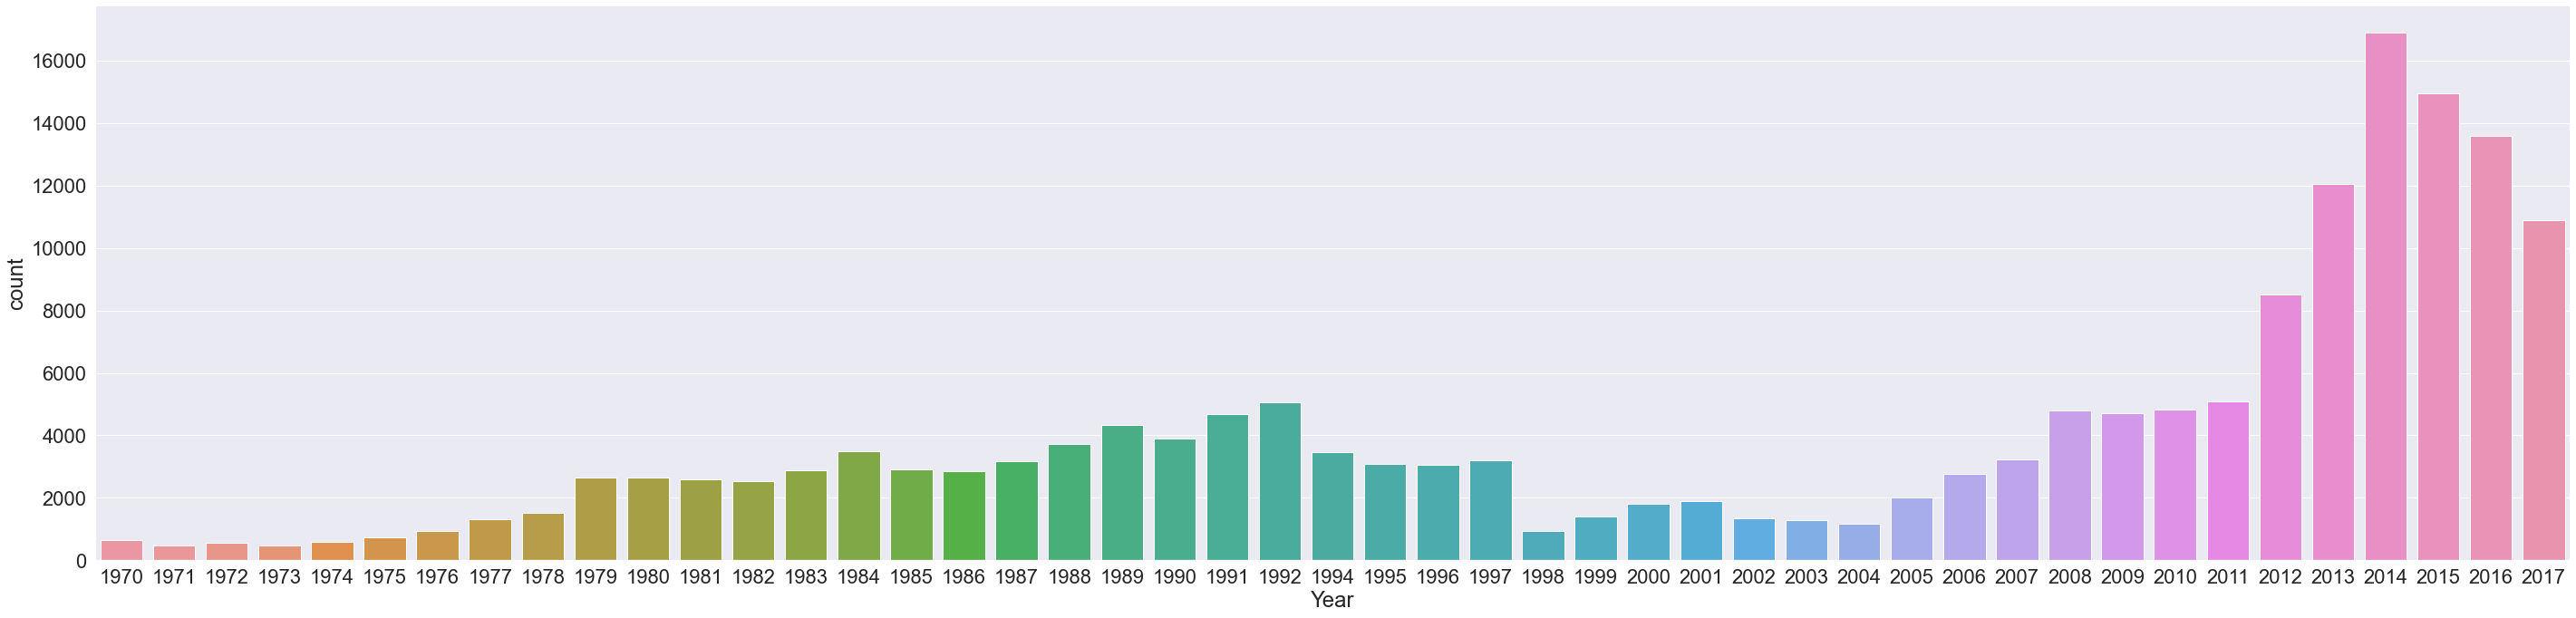

In [15]:
sns.catplot(x="Year",data=terror,kind="count",height=10,aspect=4);

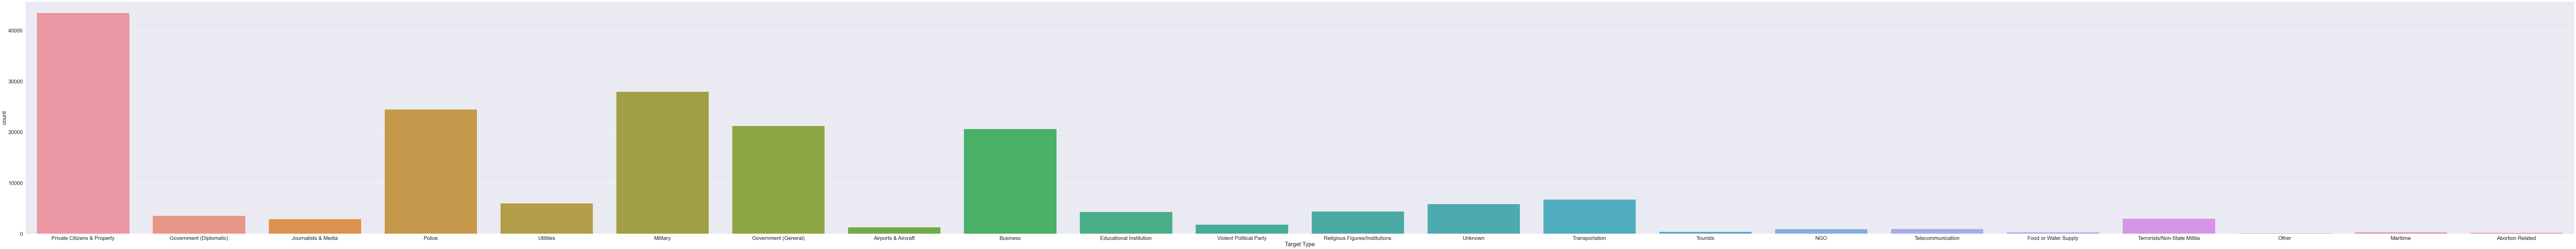

In [16]:
sns.catplot(x="Target Type",data=terror,kind="count",height=15,aspect=10);

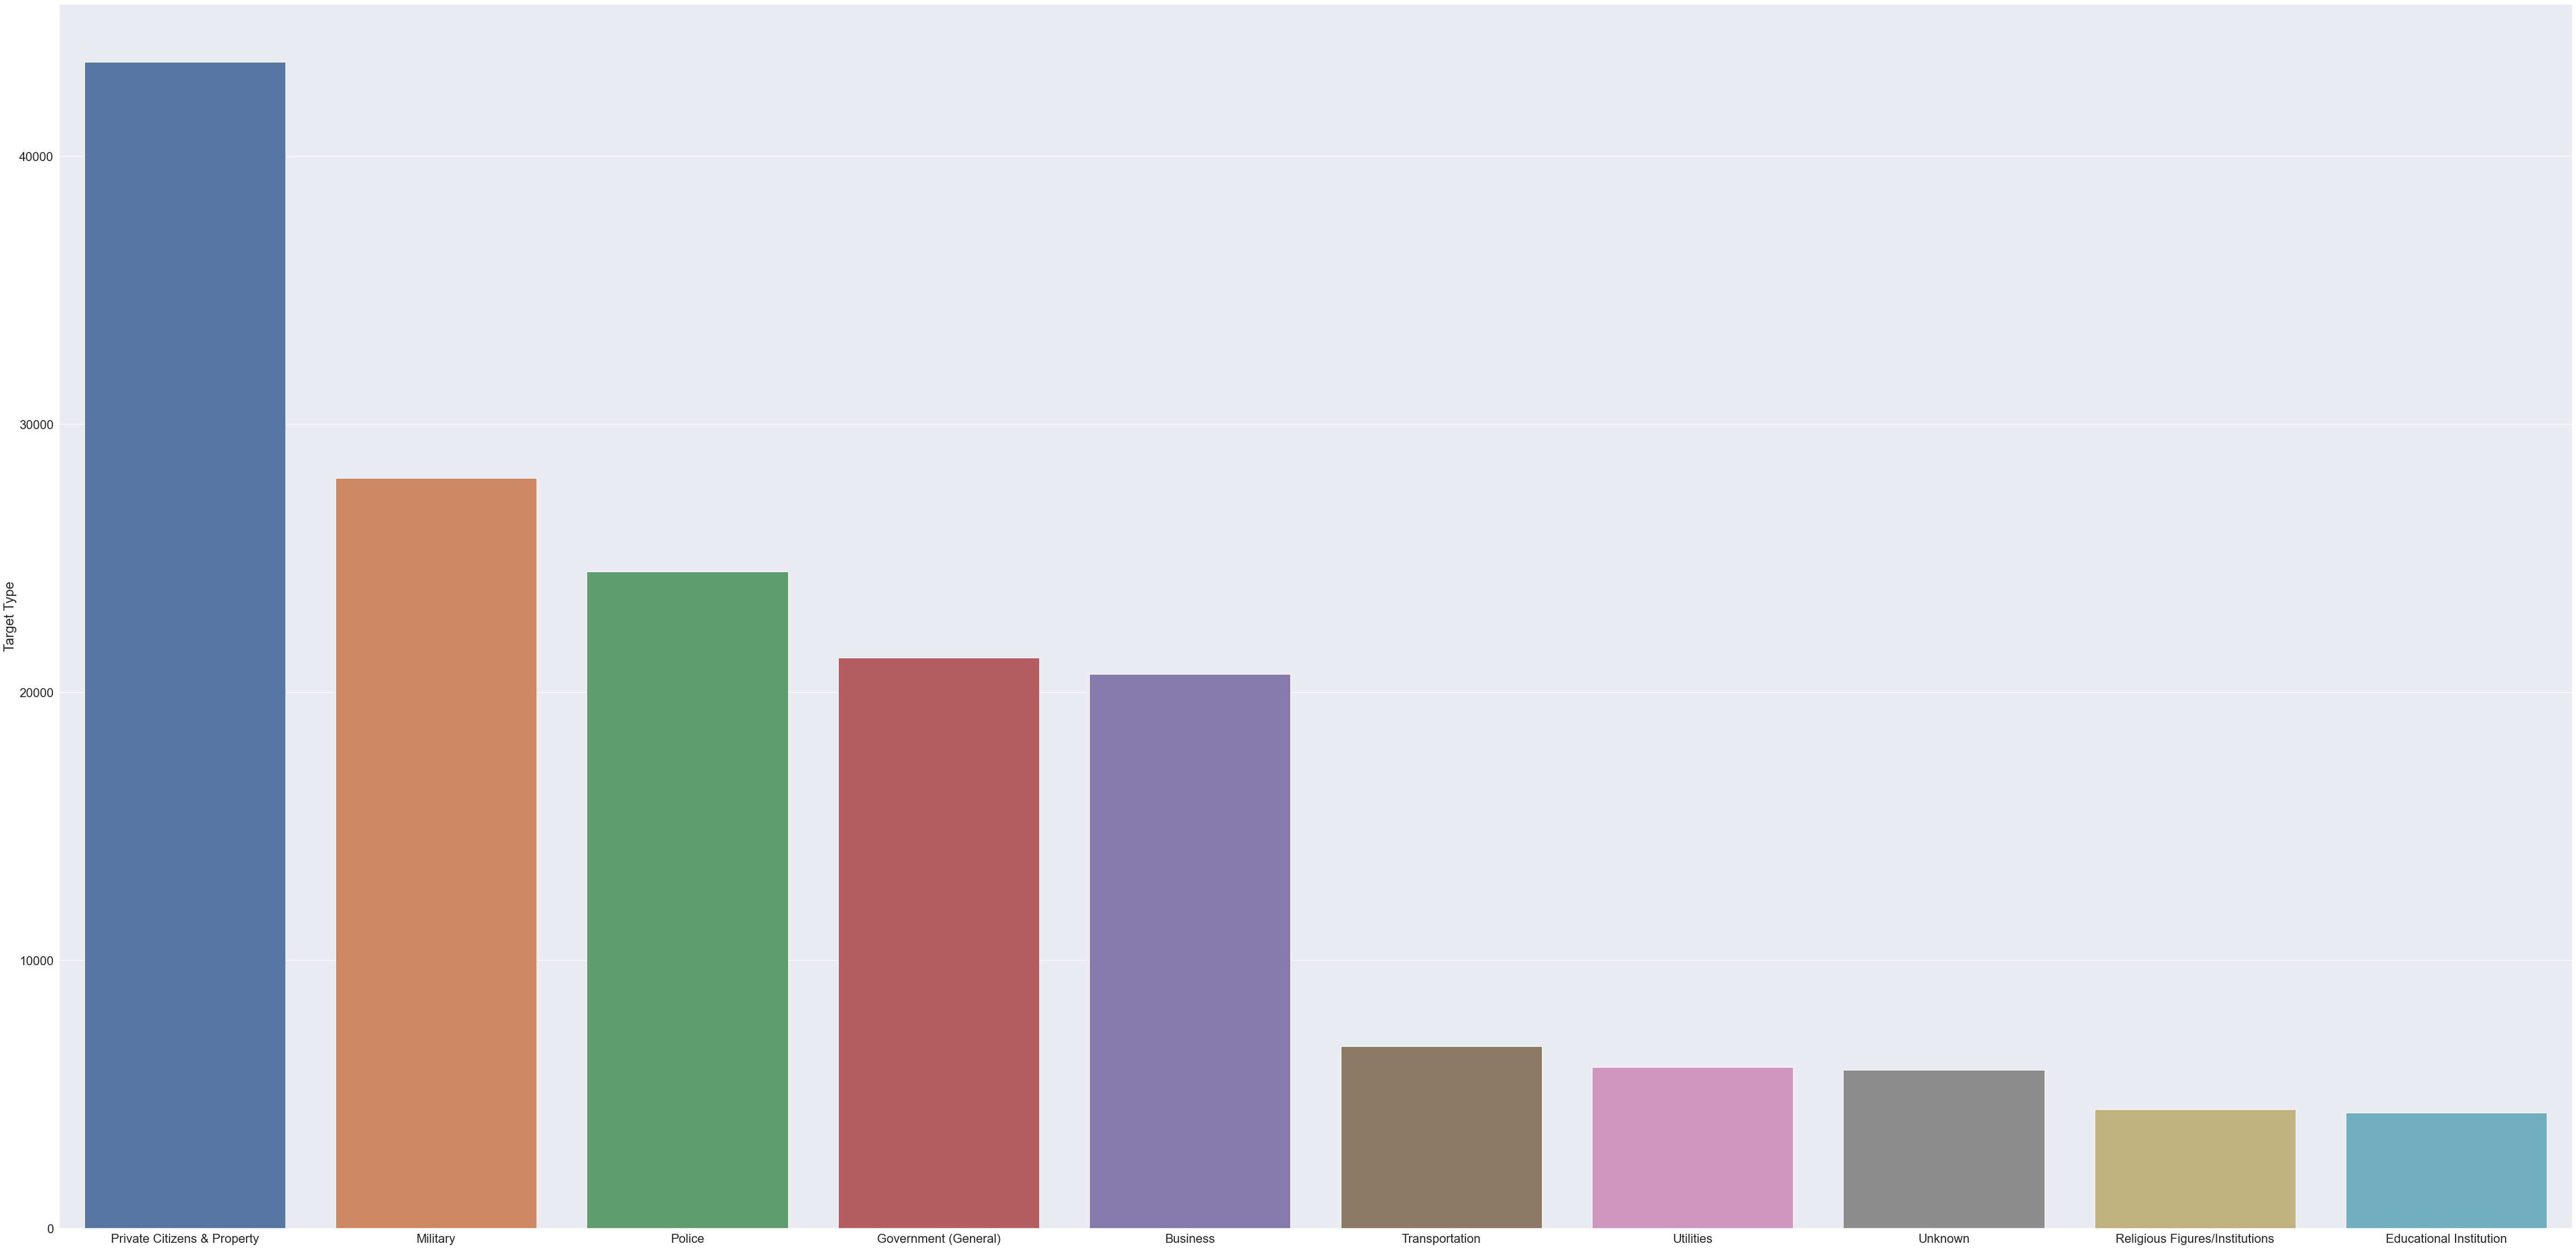

In [17]:
plt.figure(figsize=[80,40])
sns.barplot(x=list(terror["Target Type"].value_counts()[0:10].keys()), y=terror["Target Type"].value_counts()[0:10]);
plt.show;

In [18]:
x = list(terror["Years"].keys())
x

KeyError: 'Years'

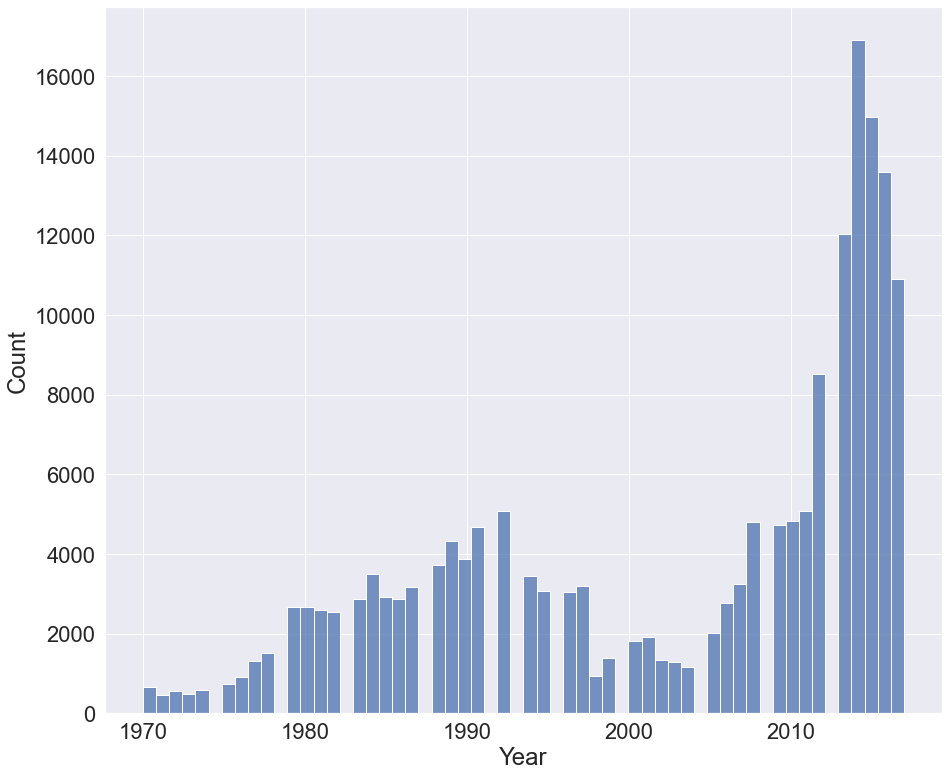

In [19]:
plt.figure(figsize=[15,13])
sns.histplot(terror["Year"]);

In [20]:
terror["Attack Group"].value_counts()[0:10]

Unknown                                             82782
Taliban                                              7478
Islamic State of Iraq and the Levant (ISIL)          5613
Shining Path (SL)                                    4555
Farabundo Marti National Liberation Front (FMLN)     3351
Al-Shabaab                                           3288
New People's Army (NPA)                              2772
Irish Republican Army (IRA)                          2671
Revolutionary Armed Forces of Colombia (FARC)        2487
Boko Haram                                           2418
Name: Attack Group, dtype: int64

In [21]:
terror["Country"].value_counts()[0:10]

Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Name: Country, dtype: int64

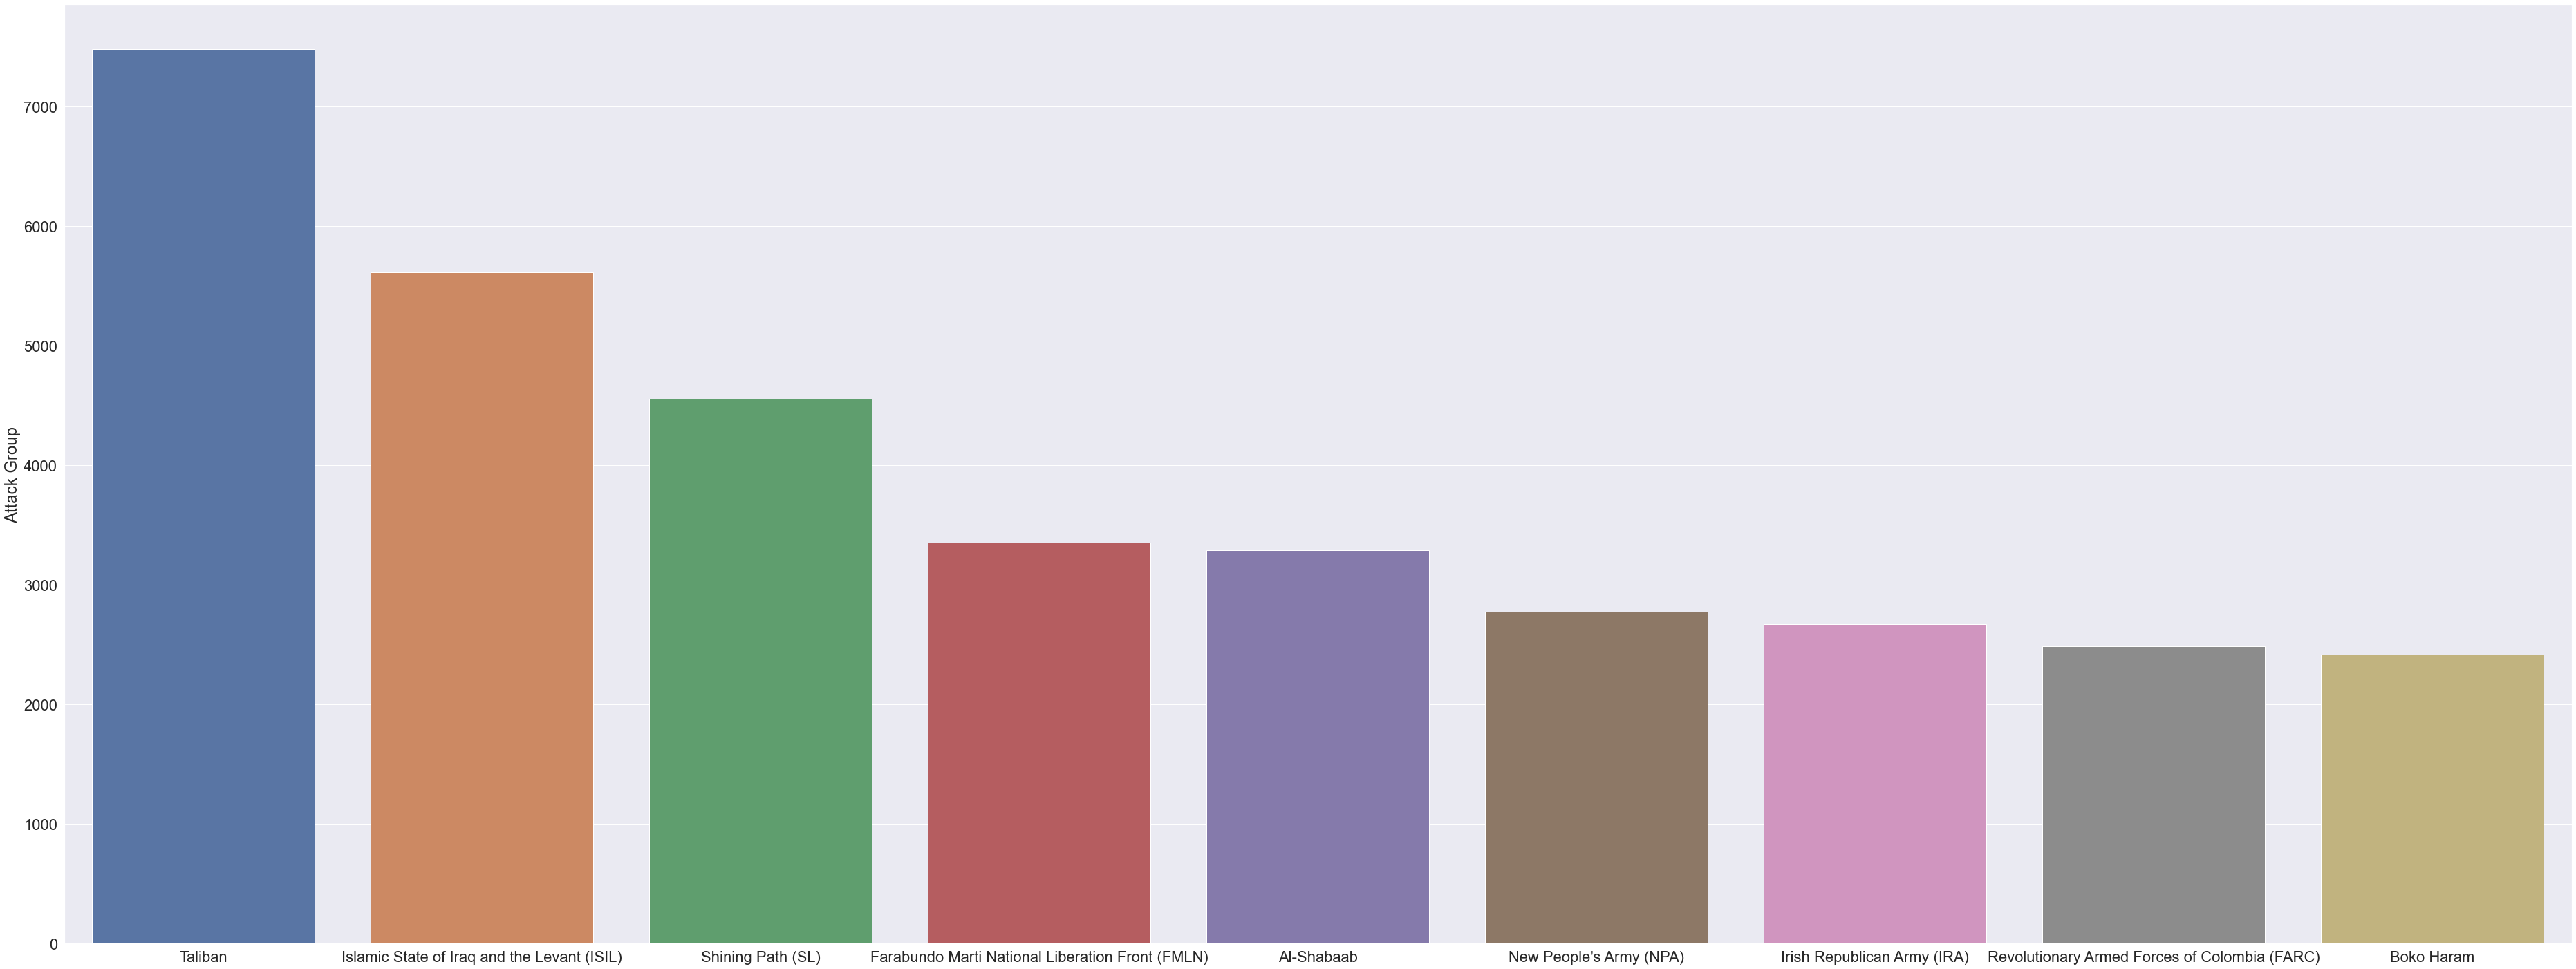

In [22]:
plt.figure(figsize=[65,25])
sns.barplot(x=list(terror["Attack Group"].value_counts()[1:10].keys()), y=terror["Attack Group"].value_counts()[1:10]);
plt.show;

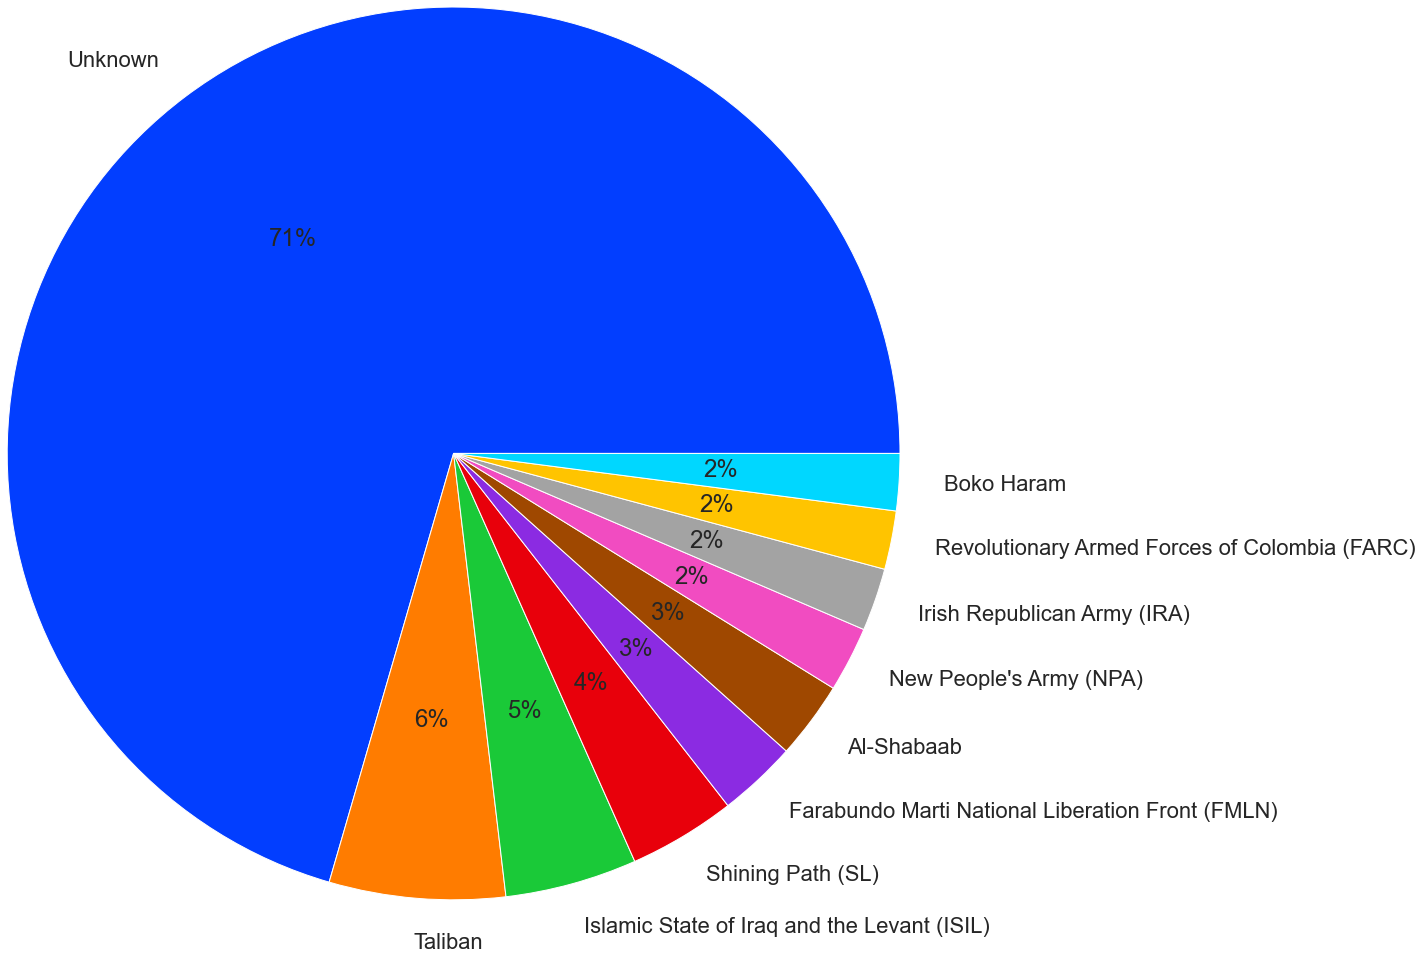

In [23]:
data = terror["Attack Group"].value_counts()[0:10]
labels = list(terror["Attack Group"].value_counts()[0:10].keys())

explode = (0.5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0) 

colors = sns.color_palette('bright')[0:10]

#create pie chart
plt.figure(figsize = (4,5))
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%', radius=5, center= (2,3))
plt.show()

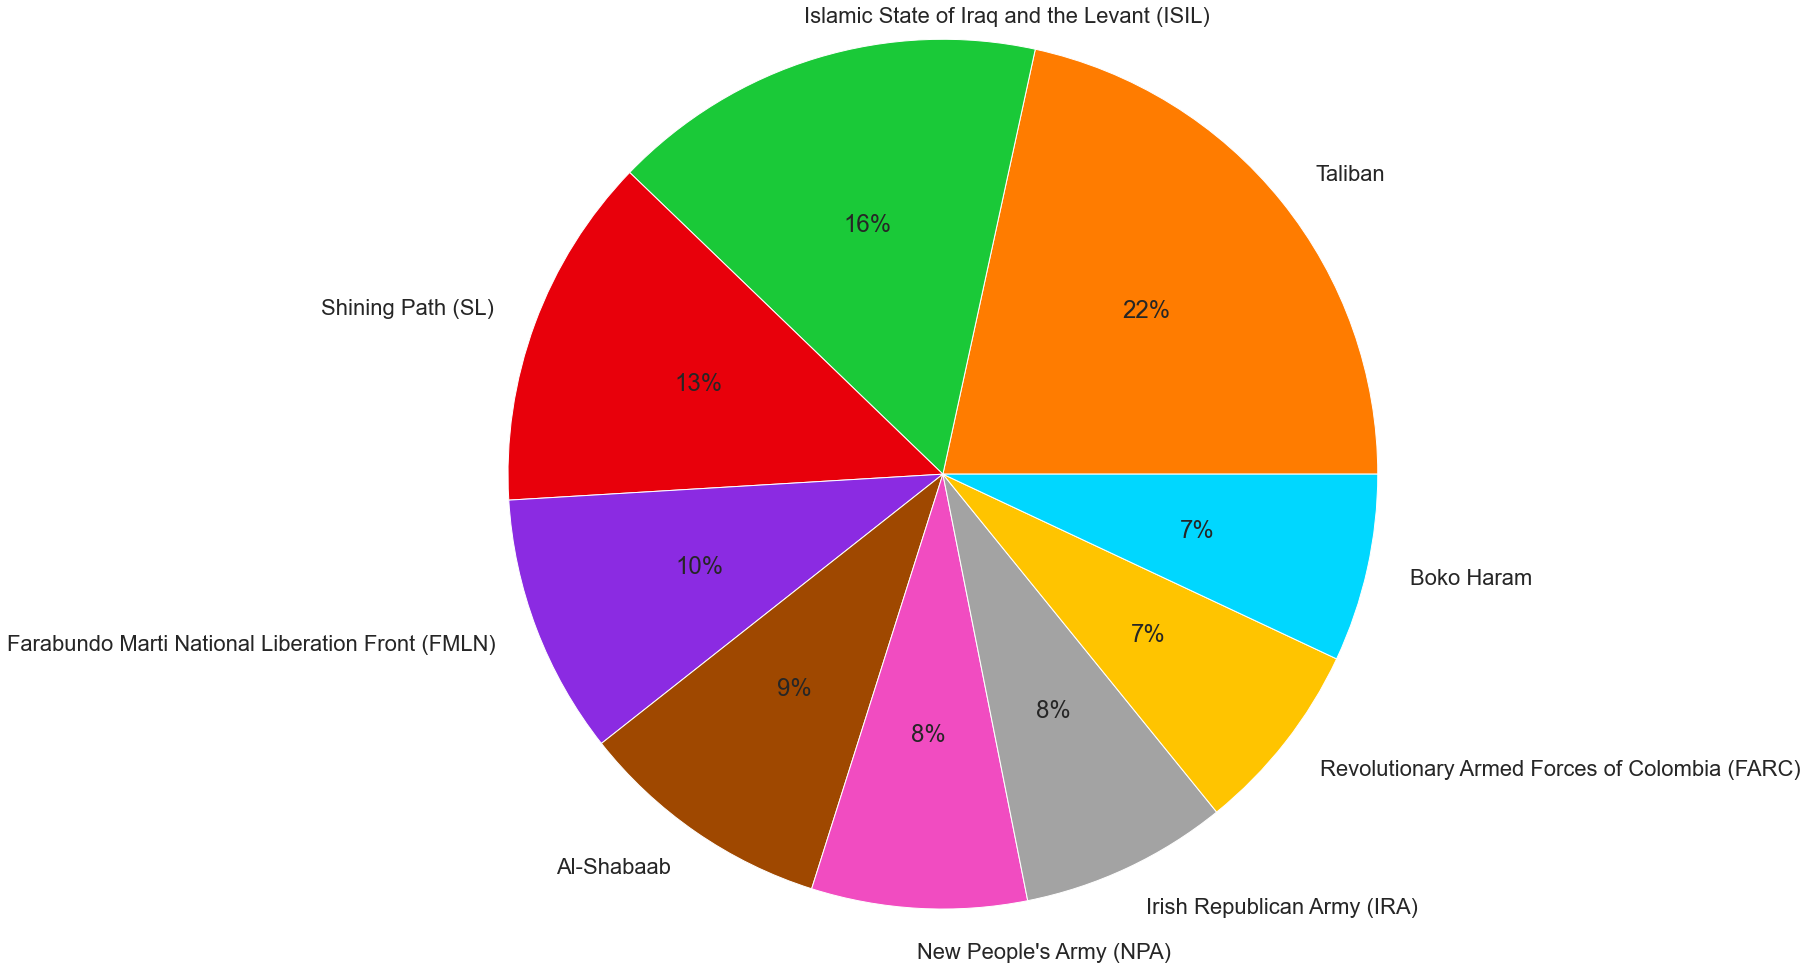

In [24]:
data1 = terror["Attack Group"].value_counts()[1:10]
labels = list(terror["Attack Group"].value_counts()[1:10].keys())

colors = sns.color_palette('bright')[1:10]

#create pie chart
plt.pie(data1, labels = labels, colors = colors, autopct='%.0f%%', radius=5, center=(2,3))
plt.show()

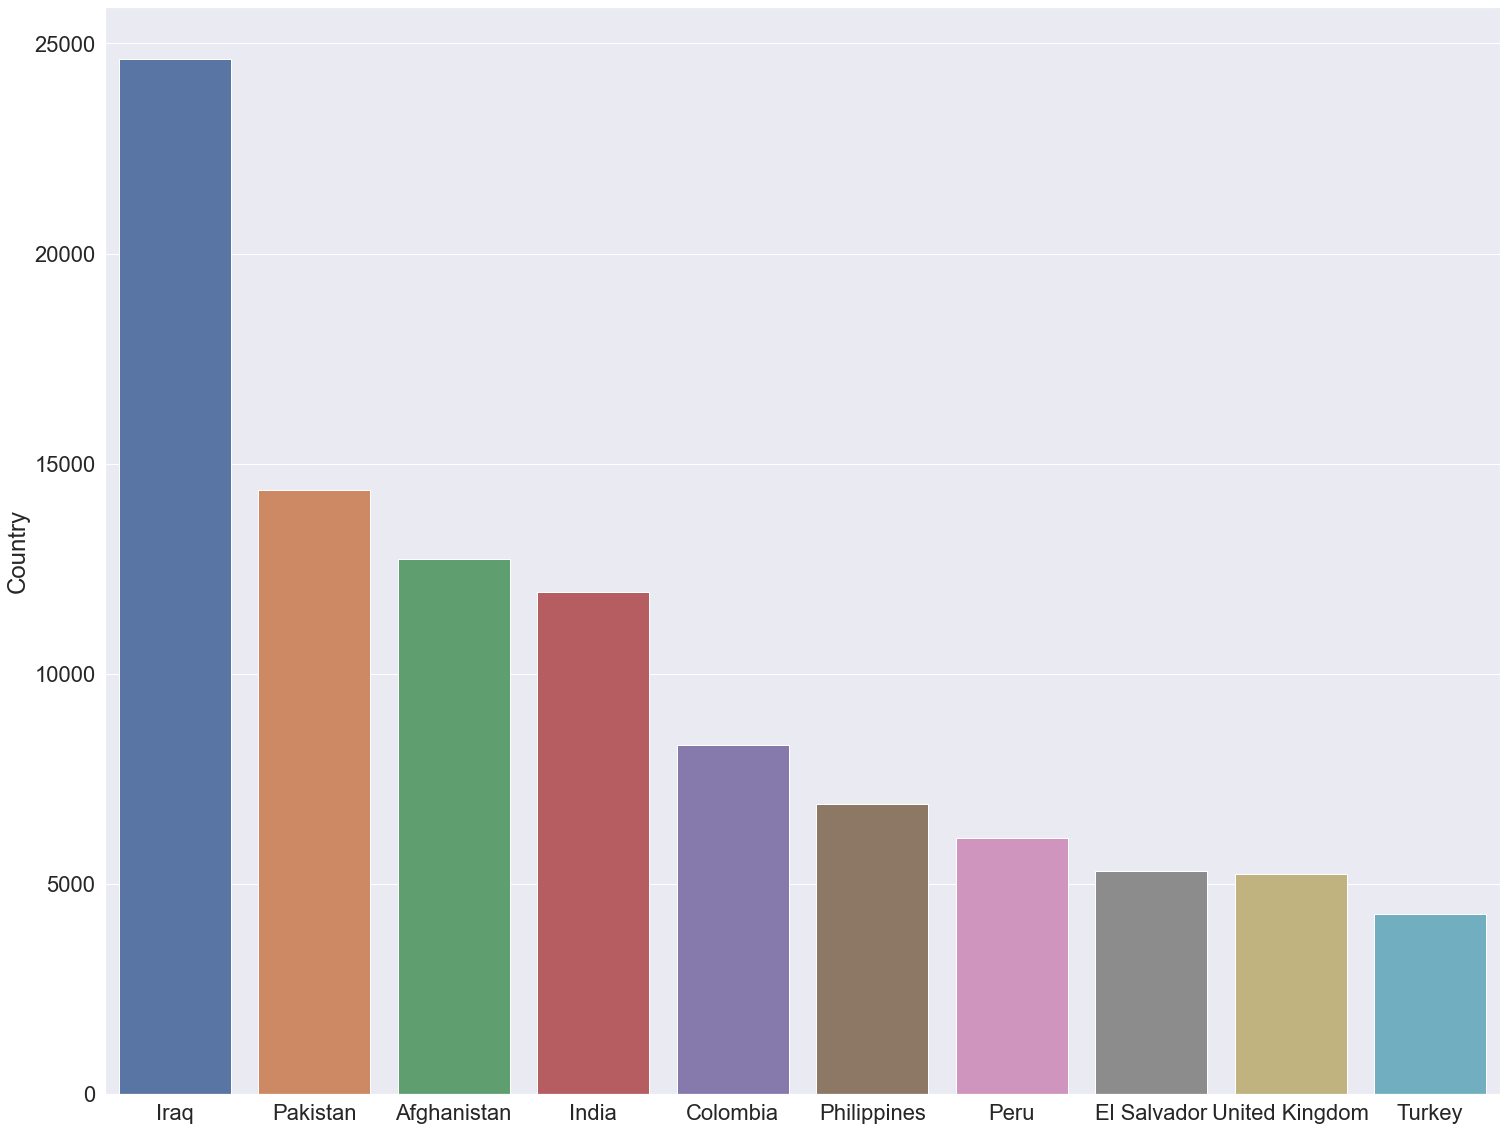

In [25]:
plt.figure(figsize=[25,20])
sns.barplot(x=list(terror["Country"].value_counts()[0:10].keys()), y=terror["Country"].value_counts()[0:10]);
plt.show;

In [26]:
terror1=terror[["Extended","Suicide","Success","Number of People Killed"]]

<AxesSubplot:>

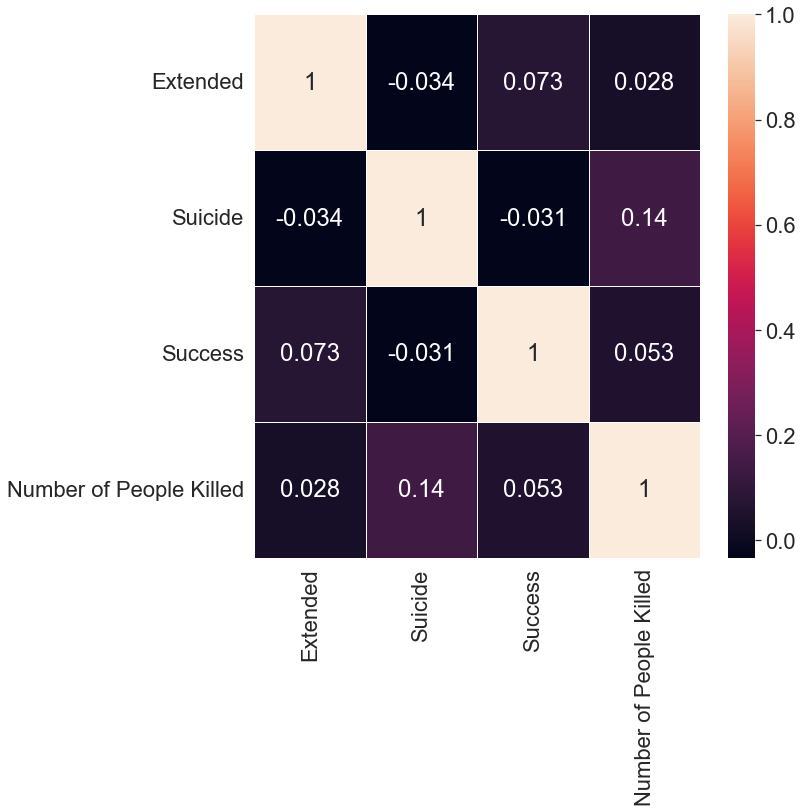

In [27]:
plt.figure(figsize=(10,10))
sns.heatmap(terror1.corr(method="pearson"),annot=True, linewidths=1)

In [28]:
terror["Number of People Killed"]

0         1.0
1         0.0
2         1.0
3         NaN
4         NaN
         ... 
181686    1.0
181687    2.0
181688    0.0
181689    0.0
181690    0.0
Name: Number of People Killed, Length: 181691, dtype: float64

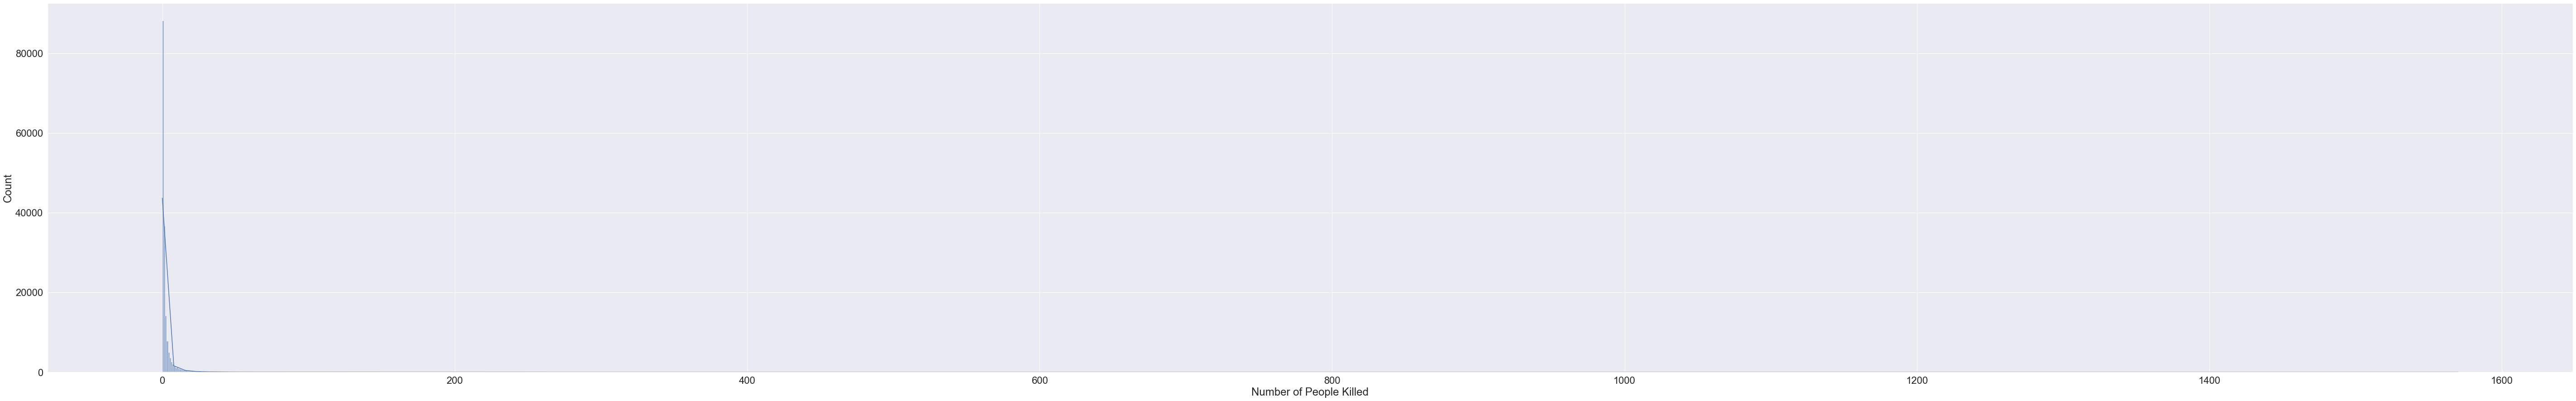

In [29]:
plt.figure(figsize=[100,15])
sns.histplot(data=terror, x="Number of People Killed", binwidth=1, kde=True);

In [30]:
terror["Number of People Killed"].value_counts()

0.0      88149
1.0      36576
2.0      14147
3.0       7738
4.0       4961
         ...  
275.0        1
320.0        1
104.0        1
271.0        1
311.0        1
Name: Number of People Killed, Length: 205, dtype: int64

In [31]:
pip install geopandas

  Using cached geopandas-0.10.2-py2.py3-none-any.whl (1.0 MB)



    ERROR: Command errored out with exit status 1:
     command: 'C:\ProgramData\Anaconda3\python.exe' -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = "C:\\Users\\Mitra'"'"'s\\AppData\\Local\\Temp\\pip-install-hs2maagd\\fiona_9efd32684d1f4c6e9221ceca44c97a8b\\setup.py"; __file__="C:\\Users\\Mitra'"'"'s\\AppData\\Local\\Temp\\pip-install-hs2maagd\\fiona_9efd32684d1f4c6e9221ceca44c97a8b\\setup.py";f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' egg_info --egg-base 'C:\Users\Mitra'"'"'s\AppData\Local\Temp\pip-pip-egg-info-i7r_fmsv'
         cwd: C:\Users\Mitra's\AppData\Local\Temp\pip-install-hs2maagd\fiona_9efd32684d1f4c6e9221ceca44c97a8b\
    Complete output (1 lines):
    A GDAL API version must be specified. Provide a path to gdal-config using a GDAL_CONFIG environm

  Using cached Fiona-1.8.21.tar.gz (1.0 MB)
  Using cached Fiona-1.8.20.tar.gz (1.3 MB)
  Using cached Fiona-1.8.19.tar.gz (1.3 MB)
  Using cached Fiona-1.8.18.tar.gz (1.3 MB)
  Using cached Fiona-1.8.17.tar.gz (1.3 MB)
  Using cached Fiona-1.8.16.tar.gz (1.3 MB)
  Using cached Fiona-1.8.15.tar.gz (1.3 MB)
  Using cached Fiona-1.8.14.tar.gz (1.3 MB)
  Using cached Fiona-1.8.13.post1.tar.gz (1.2 MB)
  Using cached Fiona-1.8.13.tar.gz (1.2 MB)
  Using cached Fiona-1.8.12.tar.gz (1.2 MB)
  Using cached Fiona-1.8.11.tar.gz (1.2 MB)
  Using cached Fiona-1.8.10.tar.gz (1.2 MB)
  Using cached Fiona-1.8.9.post2.tar.gz (1.2 MB)
  Using cached Fiona-1.8.9.post1.tar.gz (1.2 MB)
  Using cached Fiona-1.8.9.tar.gz (1.2 MB)
  Using cached Fiona-1.8.8.tar.gz (1.7 MB)
  Using cached Fiona-1.8.7.tar.gz (1.7 MB)
  Using cached Fiona-1.8.6.tar.gz (1.7 MB)
  Using cached Fiona-1.8.5.tar.gz (1.7 MB)
  Using cached Fiona-1.8.4.tar.gz (1.1 MB)
  Using cached Fiona-1.8.3.tar.gz (1.1 MB)
  Using cached Fiona-1.

    ----------------------------------------
    ERROR: Command errored out with exit status 1:
     command: 'C:\ProgramData\Anaconda3\python.exe' -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = "C:\\Users\\Mitra'"'"'s\\AppData\\Local\\Temp\\pip-install-hs2maagd\\fiona_7e30b9ac46a44ddbb89c4663b8d5370e\\setup.py"; __file__="C:\\Users\\Mitra'"'"'s\\AppData\\Local\\Temp\\pip-install-hs2maagd\\fiona_7e30b9ac46a44ddbb89c4663b8d5370e\\setup.py";f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' egg_info --egg-base 'C:\Users\Mitra'"'"'s\AppData\Local\Temp\pip-pip-egg-info-e56i6qjb'
         cwd: C:\Users\Mitra's\AppData\Local\Temp\pip-install-hs2maagd\fiona_7e30b9ac46a44ddbb89c4663b8d5370e\
    Complete output (1 lines):
    A GDAL API version must be specified. Provide a pat

In [32]:
import geopandas as gpd

ModuleNotFoundError: No module named 'geopandas'